In [1]:
import pandas as pd

# Load the Excel file
file_path = r"C:\Users\EJ312WS\Downloads\Dataset (1)\Dataset\train_one.xlsx"

# Read the Excel file and select the sheet you want to read
df = pd.read_excel(file_path)

# Print the contents of the she
df.head()

,Unnamed: 0,date,Energy_Consumption,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric,Date
0,0,2018-01-01 00:15:00,3.21,2.96,0.0,73.21,100.0,Low,105,2018-01-01
1,1,2018-01-01 00:30:00,3.95,4.46,0.0,66.78,100.0,Low,101,2018-01-01
2,2,2018-01-01 00:45:00,3.23,3.28,0.0,70.27,100.0,Low,94,2018-01-01
3,3,2018-01-01 01:00:00,3.33,3.56,0.0,68.10,100.0,Low,99,2018-01-01
4,4,2018-01-01 01:15:00,3.79,4.49,0.0,64.72,100.0,Low,109,2018-01-01


In [3]:
df.nunique()

Unnamed: 0                         91
date                            32850
Energy_Consumption               7804
LaRP                             5390
LeRP                             2458
LaPF                             5577
LePF                             3322
Duty                                3
Emissions_Air_Quality_Metric       26
Date                              365
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32850 entries, 0 to 32849
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    32850 non-null  int64         
 1   date                          32850 non-null  datetime64[ns]
 2   Energy_Consumption            32850 non-null  float64       
 3   LaRP                          32850 non-null  float64       
 4   LeRP                          32850 non-null  float64       
 5   LaPF                          32850 non-null  float64       
 6   LePF                          32850 non-null  float64       
 7   Duty                          32850 non-null  object        
 8   Emissions_Air_Quality_Metric  32850 non-null  int64         
 9   Date                          32850 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(2), object(1)
memory usage: 2.5+ MB


In [7]:
df=df.drop(['Unnamed: 0','Date'],axis=1)
df.head()

,date,Energy_Consumption,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric
0,2018-01-01 00:15:00,3.21,2.96,0.0,73.21,100.0,Low,105
1,2018-01-01 00:30:00,3.95,4.46,0.0,66.78,100.0,Low,101
2,2018-01-01 00:45:00,3.23,3.28,0.0,70.27,100.0,Low,94
3,2018-01-01 01:00:00,3.33,3.56,0.0,68.10,100.0,Low,99
4,2018-01-01 01:15:00,3.79,4.49,0.0,64.72,100.0,Low,109


In [9]:
df.isnull().sum()

date                            0
Energy_Consumption              0
LaRP                            0
LeRP                            0
LaPF                            0
LePF                            0
Duty                            0
Emissions_Air_Quality_Metric    0
dtype: int64

In [11]:
df.date=pd.to_datetime(df.date, infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32850 entries, 0 to 32849
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          32850 non-null  datetime64[ns]
 1   Energy_Consumption            32850 non-null  float64       
 2   LaRP                          32850 non-null  float64       
 3   LeRP                          32850 non-null  float64       
 4   LaPF                          32850 non-null  float64       
 5   LePF                          32850 non-null  float64       
 6   Duty                          32850 non-null  object        
 7   Emissions_Air_Quality_Metric  32850 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.0+ MB


In [13]:
def day_part(hour):
    if hour in [4,5]:
        return 1
    elif hour in [6,7]:
        return 2
    elif hour in [8,9,10]:
        return 3
    elif hour in [11,12,13]:
        return 4
    elif hour in [14,15,16]:
        return 5
    elif hour in [17, 18,19]:
        return 6
    elif hour in [20, 21, 22]:
        return 7
    elif hour in [23,0,1,2,3]:
        return 0

In [15]:
import numpy as np


# Extract date features
df['date:year'] = df['date'].dt.year
df['date:month'] = df['date'].dt.month
df['date:day'] = df['date'].dt.day
df['date:day_of_week'] = df['date'].dt.dayofweek  # corrected attribute name
df['date:day_of_year'] = df['date'].dt.dayofyear  # corrected attribute name
df['date:is_year_start'] = df['date'].dt.is_year_start
df['date:is_quarter_start'] = df['date'].dt.is_quarter_start
df['date:is_year_end'] = df['date'].dt.is_year_end
df['date:is_quarter_end'] = df['date'].dt.is_quarter_end
df['date:is_month_start'] = df['date'].dt.is_month_start
df['date:is_month_end'] = df['date'].dt.is_month_end
df['date:is_weekend'] = np.where(df['date:day_of_week'].isin([5,6]), 1, 0)
df['date:hour'] = df['date'].dt.hour
df['date:minute'] = df['date'].dt.minute
df['date:day_part'] = df['date:hour'].apply(day_part)

# Convert boolean columns to integer
df[['date:is_month_end', 'date:is_month_start',
    'date:is_quarter_end', 'date:is_quarter_start',
    'date:is_year_end', 'date:is_year_start']] = df[['date:is_month_end', 'date:is_month_start',
    'date:is_quarter_end', 'date:is_quarter_start',
    'date:is_year_end', 'date:is_year_start']].replace({True: 1, False: 0})

# Drop the original 'date' column
#df = df.drop(['date'], axis=1)

# Print the first few rows of the modified DataFrame
df

,date,Energy_Consumption,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric,date:year,date:month,...,date:is_year_start,date:is_quarter_start,date:is_year_end,date:is_quarter_end,date:is_month_start,date:is_month_end,date:is_weekend,date:hour,date:minute,date:day_part
0,2018-01-01 00:15:00,3.21,2.96,0.00,73.21,100.00,Low,105,2018,1,...,1,1,0,0,1,0,0,0,15,0
1,2018-01-01 00:30:00,3.95,4.46,0.00,66.78,100.00,Low,101,2018,1,...,1,1,0,0,1,0,0,0,30,0
2,2018-01-01 00:45:00,3.23,3.28,0.00,70.27,100.00,Low,94,2018,1,...,1,1,0,0,1,0,0,0,45,0
3,2018-01-01 01:00:00,3.33,3.56,0.00,68.10,100.00,Low,99,2018,1,...,1,1,0,0,1,0,0,1,0,0
4,2018-01-01 01:15:00,3.79,4.49,0.00,64.72,100.00,Low,109,2018,1,...,1,1,0,0,1,0,0,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32845,2018-12-31 22:45:00,3.84,4.56,0.00,64.37,100.00,Low,91,2018,12,...,0,0,1,1,0,1,0,22,45,7
32846,2018-12-31 23:15:00,3.81,3.76,0.00,70.71,100.00,Low,99,2018,12,...,0,0,1,1,0,1,0,23,15,0
32847,2018-12-31 23:30:00,3.82,3.16,0.07,76.64,99.99,Low,107,2018,12,...,0,0,1,1,0,1,0,23,30,0
32848,2018-12-31 23:45:00,3.85,3.07,0.13,77.72,99.96,Low,105,2018,12,...,0,0,1,1,0,1,0,23,45,0


In [17]:
nunique_df=df.nunique().reset_index()
remove_col=nunique_df[(nunique_df[0]==0) | (nunique_df[0]==1) ]['index'].tolist()
remove_col[:5]

['date:year']

In [19]:
df=df.drop(remove_col,axis=1)
df

,date,Energy_Consumption,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric,date:month,date:day,...,date:is_year_start,date:is_quarter_start,date:is_year_end,date:is_quarter_end,date:is_month_start,date:is_month_end,date:is_weekend,date:hour,date:minute,date:day_part
0,2018-01-01 00:15:00,3.21,2.96,0.00,73.21,100.00,Low,105,1,1,...,1,1,0,0,1,0,0,0,15,0
1,2018-01-01 00:30:00,3.95,4.46,0.00,66.78,100.00,Low,101,1,1,...,1,1,0,0,1,0,0,0,30,0
2,2018-01-01 00:45:00,3.23,3.28,0.00,70.27,100.00,Low,94,1,1,...,1,1,0,0,1,0,0,0,45,0
3,2018-01-01 01:00:00,3.33,3.56,0.00,68.10,100.00,Low,99,1,1,...,1,1,0,0,1,0,0,1,0,0
4,2018-01-01 01:15:00,3.79,4.49,0.00,64.72,100.00,Low,109,1,1,...,1,1,0,0,1,0,0,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32845,2018-12-31 22:45:00,3.84,4.56,0.00,64.37,100.00,Low,91,12,31,...,0,0,1,1,0,1,0,22,45,7
32846,2018-12-31 23:15:00,3.81,3.76,0.00,70.71,100.00,Low,99,12,31,...,0,0,1,1,0,1,0,23,15,0
32847,2018-12-31 23:30:00,3.82,3.16,0.07,76.64,99.99,Low,107,12,31,...,0,0,1,1,0,1,0,23,30,0
32848,2018-12-31 23:45:00,3.85,3.07,0.13,77.72,99.96,Low,105,12,31,...,0,0,1,1,0,1,0,23,45,0


In [20]:
df['Duty'].value_counts()

Low        16965
Average     9083
Major       6802
Name: Duty, dtype: int64

In [23]:
df['Duty']=df['Duty'].replace({'Low':0, 
                       'Average':1,
                       'Major':2})
df

,date,Energy_Consumption,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric,date:month,date:day,...,date:is_year_start,date:is_quarter_start,date:is_year_end,date:is_quarter_end,date:is_month_start,date:is_month_end,date:is_weekend,date:hour,date:minute,date:day_part
0,2018-01-01 00:15:00,3.21,2.96,0.00,73.21,100.00,0,105,1,1,...,1,1,0,0,1,0,0,0,15,0
1,2018-01-01 00:30:00,3.95,4.46,0.00,66.78,100.00,0,101,1,1,...,1,1,0,0,1,0,0,0,30,0
2,2018-01-01 00:45:00,3.23,3.28,0.00,70.27,100.00,0,94,1,1,...,1,1,0,0,1,0,0,0,45,0
3,2018-01-01 01:00:00,3.33,3.56,0.00,68.10,100.00,0,99,1,1,...,1,1,0,0,1,0,0,1,0,0
4,2018-01-01 01:15:00,3.79,4.49,0.00,64.72,100.00,0,109,1,1,...,1,1,0,0,1,0,0,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32845,2018-12-31 22:45:00,3.84,4.56,0.00,64.37,100.00,0,91,12,31,...,0,0,1,1,0,1,0,22,45,7
32846,2018-12-31 23:15:00,3.81,3.76,0.00,70.71,100.00,0,99,12,31,...,0,0,1,1,0,1,0,23,15,0
32847,2018-12-31 23:30:00,3.82,3.16,0.07,76.64,99.99,0,107,12,31,...,0,0,1,1,0,1,0,23,30,0
32848,2018-12-31 23:45:00,3.85,3.07,0.13,77.72,99.96,0,105,12,31,...,0,0,1,1,0,1,0,23,45,0


In [25]:
# Replace 0 with 0.1 in the 'LeRP' column
#df['LeRP'] = df['LeRP'].replace(0, 0.1)

# Total Reactive Power (TRP)
df['TRP'] = df['LaRP'] - df['LeRP']

# Lagging/Leading Ratio (LLR)
df['LLR'] = df['LaRP'] / (df['LeRP'] + 0.1)

# Combined Power Factor (Combined PF)
df['Combined PF'] = (df['LaPF'] + df['LePF']) / 2

# Displaying the DataFrame
df

,date,Energy_Consumption,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric,date:month,date:day,...,date:is_quarter_end,date:is_month_start,date:is_month_end,date:is_weekend,date:hour,date:minute,date:day_part,TRP,LLR,Combined PF
0,2018-01-01 00:15:00,3.21,2.96,0.00,73.21,100.00,0,105,1,1,...,0,1,0,0,0,15,0,2.96,29.600000,86.605
1,2018-01-01 00:30:00,3.95,4.46,0.00,66.78,100.00,0,101,1,1,...,0,1,0,0,0,30,0,4.46,44.600000,83.390
2,2018-01-01 00:45:00,3.23,3.28,0.00,70.27,100.00,0,94,1,1,...,0,1,0,0,0,45,0,3.28,32.800000,85.135
3,2018-01-01 01:00:00,3.33,3.56,0.00,68.10,100.00,0,99,1,1,...,0,1,0,0,1,0,0,3.56,35.600000,84.050
4,2018-01-01 01:15:00,3.79,4.49,0.00,64.72,100.00,0,109,1,1,...,0,1,0,0,1,15,0,4.49,44.900000,82.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32845,2018-12-31 22:45:00,3.84,4.56,0.00,64.37,100.00,0,91,12,31,...,1,0,1,0,22,45,7,4.56,45.600000,82.185
32846,2018-12-31 23:15:00,3.81,3.76,0.00,70.71,100.00,0,99,12,31,...,1,0,1,0,23,15,0,3.76,37.600000,85.355
32847,2018-12-31 23:30:00,3.82,3.16,0.07,76.64,99.99,0,107,12,31,...,1,0,1,0,23,30,0,3.09,18.588235,88.315
32848,2018-12-31 23:45:00,3.85,3.07,0.13,77.72,99.96,0,105,12,31,...,1,0,1,0,23,45,0,2.94,13.347826,88.840


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32850 entries, 0 to 32849
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          32850 non-null  datetime64[ns]
 1   Energy_Consumption            32850 non-null  float64       
 2   LaRP                          32850 non-null  float64       
 3   LeRP                          32850 non-null  float64       
 4   LaPF                          32850 non-null  float64       
 5   LePF                          32850 non-null  float64       
 6   Duty                          32850 non-null  int64         
 7   Emissions_Air_Quality_Metric  32850 non-null  int64         
 8   date:month                    32850 non-null  int64         
 9   date:day                      32850 non-null  int64         
 10  date:day_of_week              32850 non-null  int64         
 11  date:day_of_year            

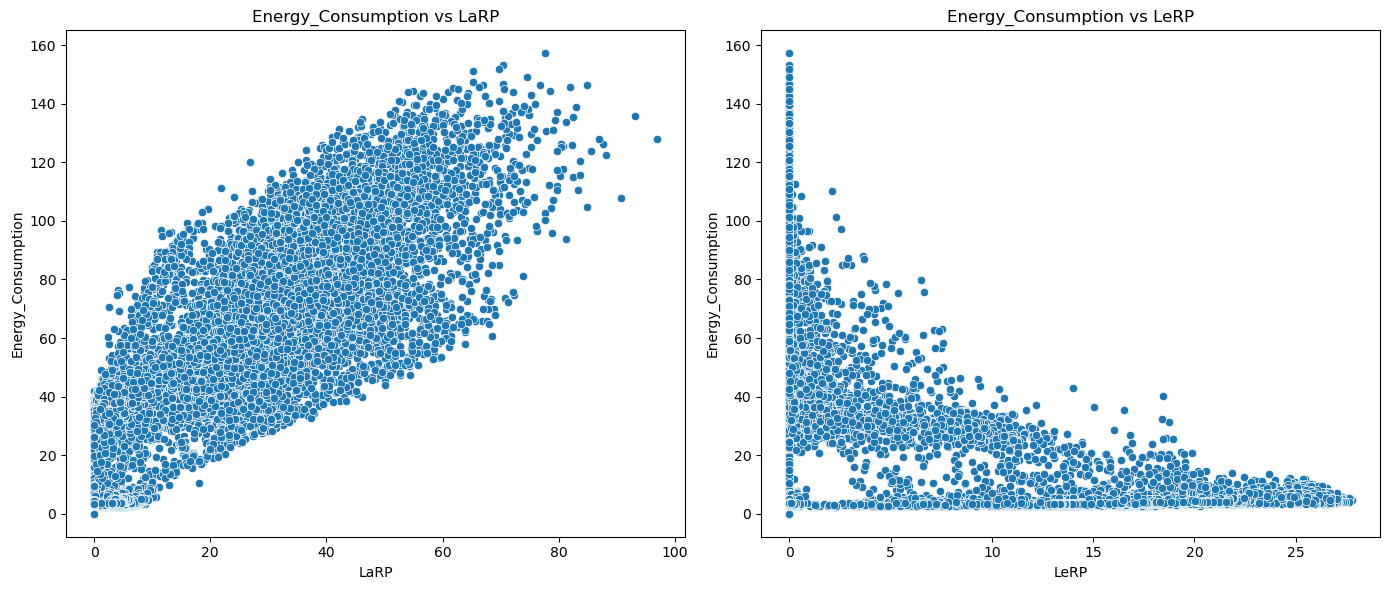

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
# Scatter plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='LaRP', y='Energy_Consumption', data=df)
plt.title('Energy_Consumption vs LaRP')

plt.subplot(1, 2, 2)
sns.scatterplot(x='LeRP', y='Energy_Consumption', data=df)
plt.title('Energy_Consumption vs LeRP')

plt.tight_layout()
plt.show()

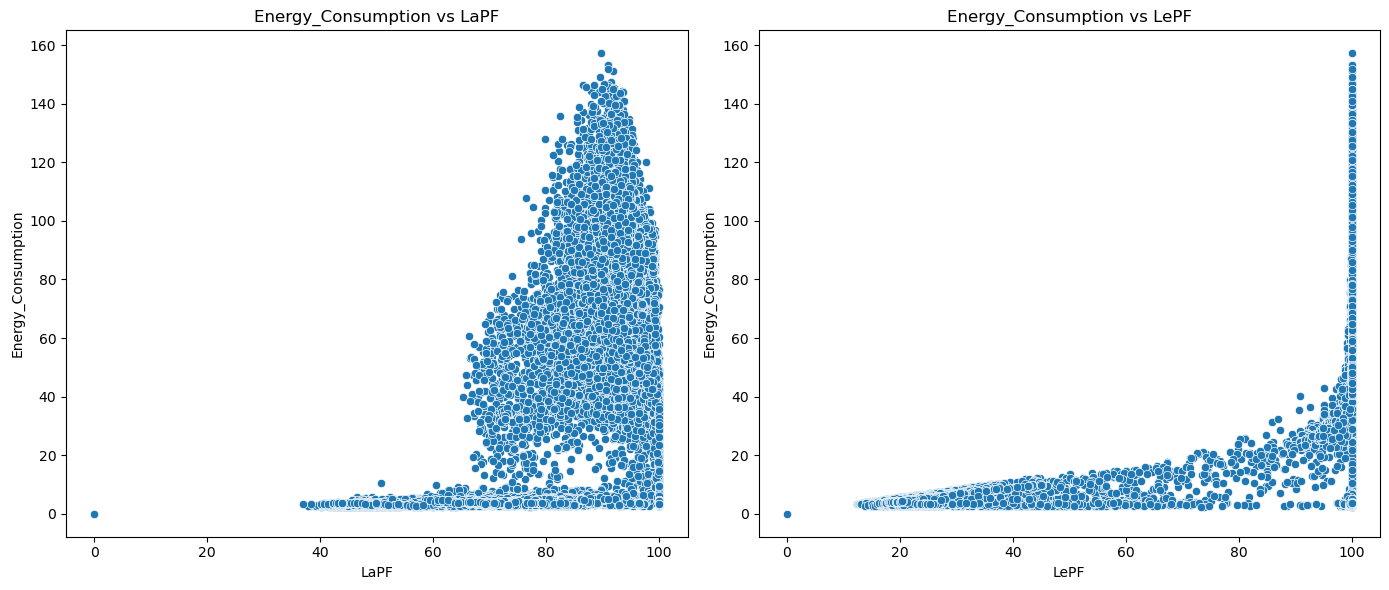

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
# Scatter plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='LaPF', y='Energy_Consumption', data=df)
plt.title('Energy_Consumption vs LaPF')

plt.subplot(1, 2, 2)
sns.scatterplot(x='LePF', y='Energy_Consumption', data=df)
plt.title('Energy_Consumption vs LePF')

plt.tight_layout()
plt.show()

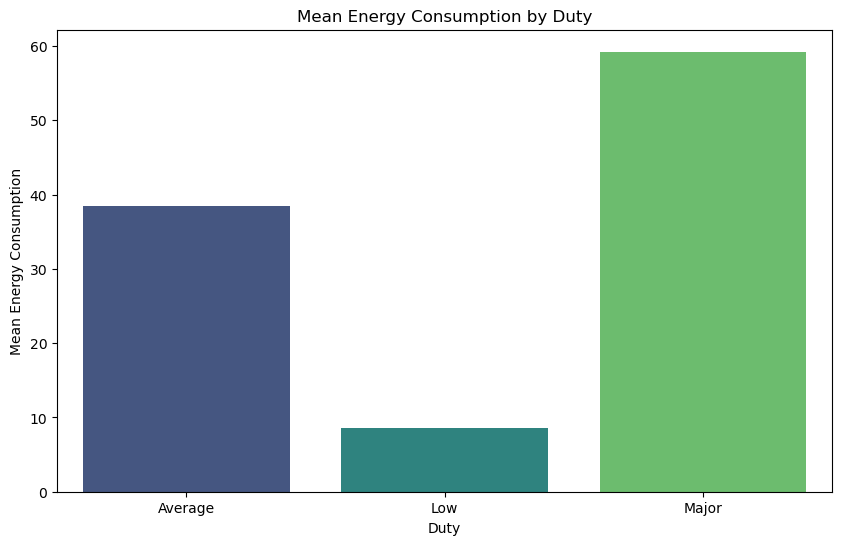

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into 'df'
# Replace 'your_dataset.csv' with the actual file path if you need to load it
# df = pd.read_csv('/mnt/data/your_dataset.csv')

# Map Duty levels
duty_mapping = {0: 'Low', 1: 'Average', 2: 'Major'}
df['Duty'] = df['Duty'].map(duty_mapping)

# Group by Duty and calculate the mean Energy Consumption
energy_duty = df.groupby('Duty')['Energy_Consumption'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Duty', y='Energy_Consumption', data=energy_duty, palette="viridis")
plt.title('Mean Energy Consumption by Duty')
plt.xlabel('Duty')
plt.ylabel('Mean Energy Consumption')
plt.show()


C:\Users\EJ312WS\AppData\Local\Temp\ipykernel_19160\830358387.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='date:day', y='Energy_Consumption', data=df, marker='o', palette="pastel")


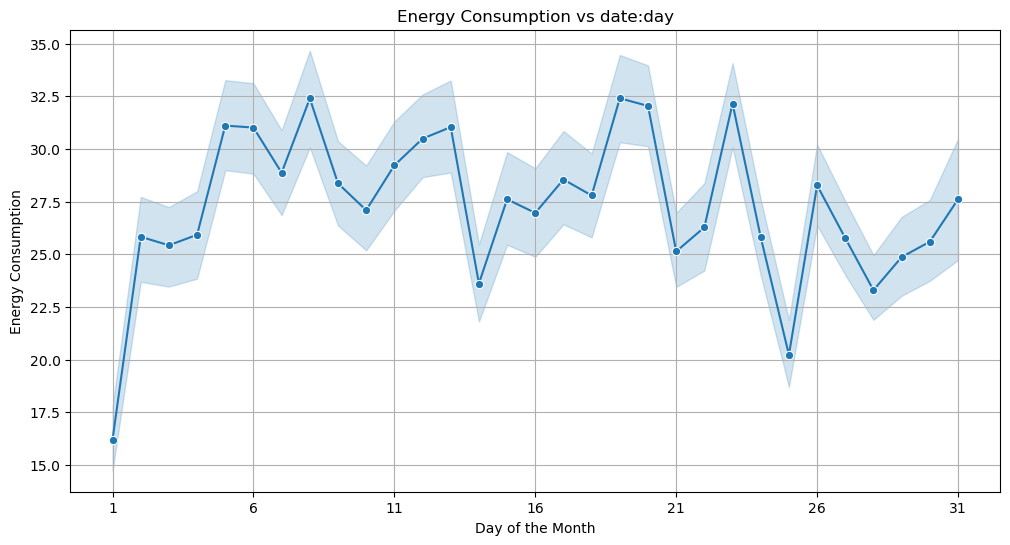

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'date:day' is treated as a numerical or categorical value
df['date:day'] = df['date:day'].astype(int)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date:day', y='Energy_Consumption', data=df, marker='o', palette="pastel")

# Customize the x-axis ticks to show every 5 days
plt.xticks(ticks=range(1, df['date:day'].max()+1, 5))

plt.title('Energy Consumption vs date:day')
plt.xlabel('Day of the Month')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()


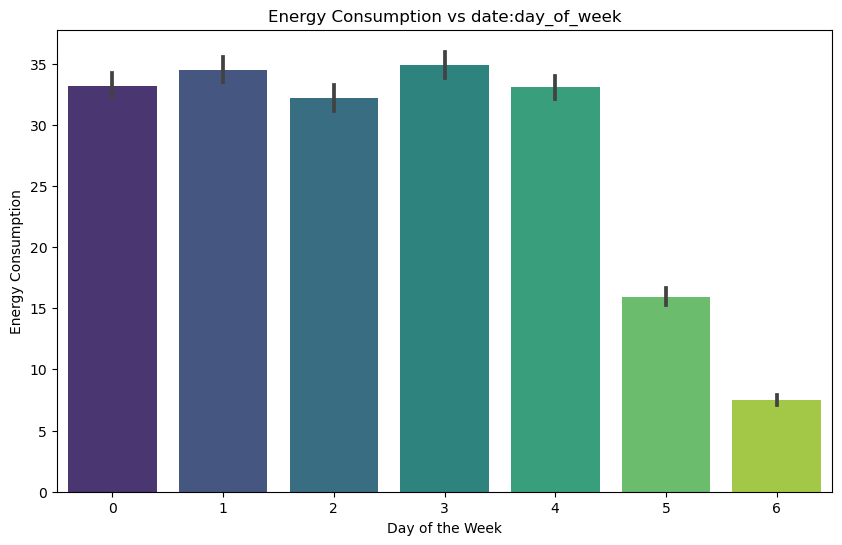

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='date:day_of_week', y='Energy_Consumption', data=df, palette="viridis")
plt.title('Energy Consumption vs date:day_of_week')
plt.xlabel('Day of the Week')
plt.ylabel('Energy Consumption')
plt.show()


C:\Users\EJ312WS\AppData\Local\Temp\ipykernel_19160\1455744305.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='date:day_of_year', y='Energy_Consumption', data=df, palette="viridis")


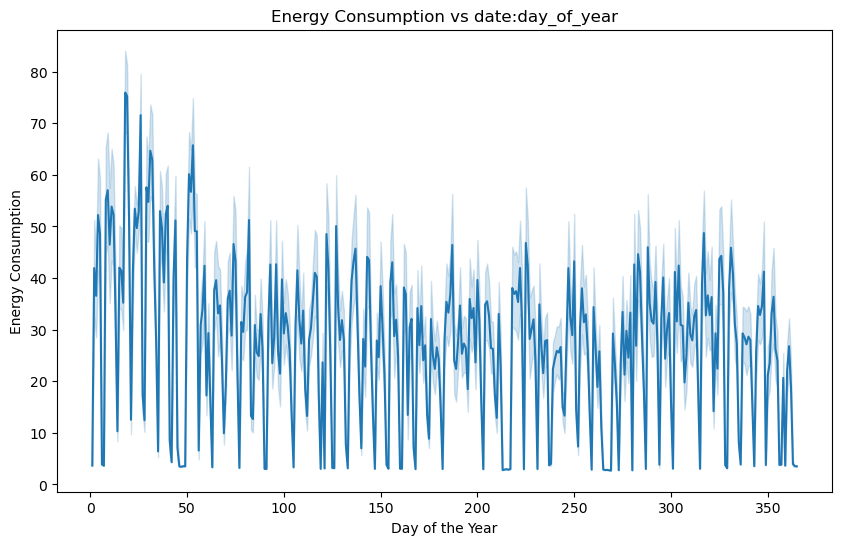

In [38]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date:day_of_year', y='Energy_Consumption', data=df, palette="viridis")
plt.title('Energy Consumption vs date:day_of_year')
plt.xlabel('Day of the Year')
plt.ylabel('Energy Consumption')
plt.show()


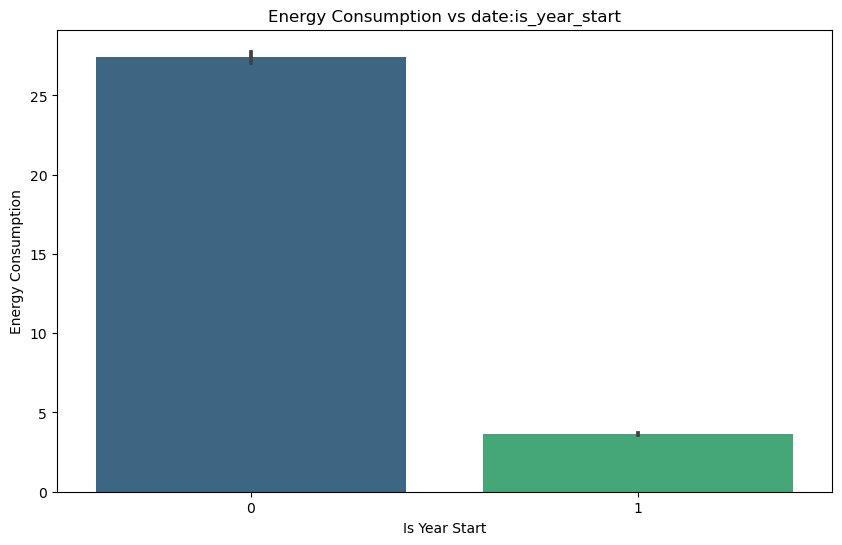

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='date:is_year_start', y='Energy_Consumption', data=df, palette="viridis")
plt.title('Energy Consumption vs date:is_year_start')
plt.xlabel('Is Year Start')
plt.ylabel('Energy Consumption')
plt.show()


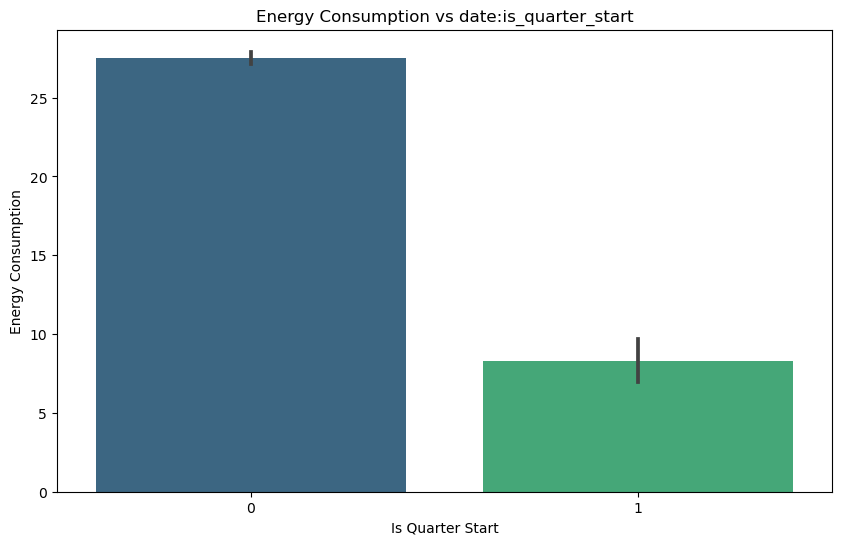

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='date:is_quarter_start', y='Energy_Consumption', data=df, palette="viridis")
plt.title('Energy Consumption vs date:is_quarter_start')
plt.xlabel('Is Quarter Start')
plt.ylabel('Energy Consumption')
plt.show()


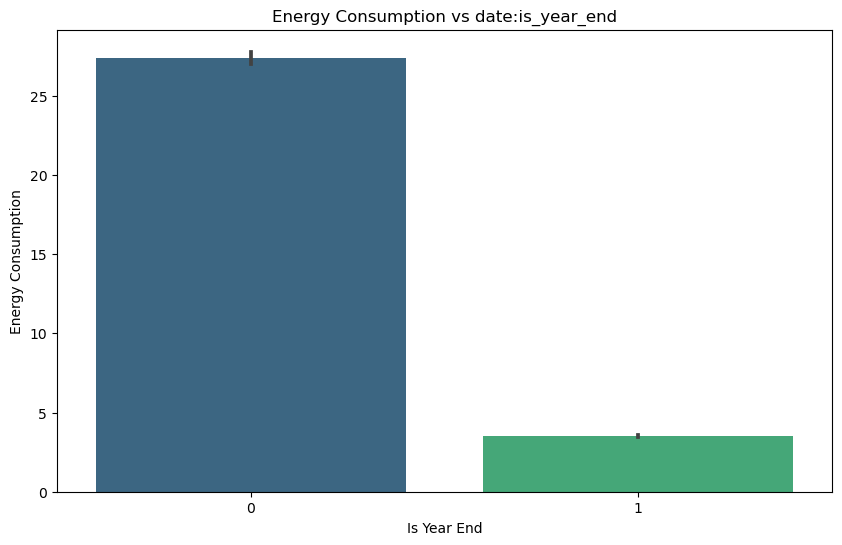

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='date:is_year_end', y='Energy_Consumption', data=df, palette="viridis")
plt.title('Energy Consumption vs date:is_year_end')
plt.xlabel('Is Year End')
plt.ylabel('Energy Consumption')
plt.show()


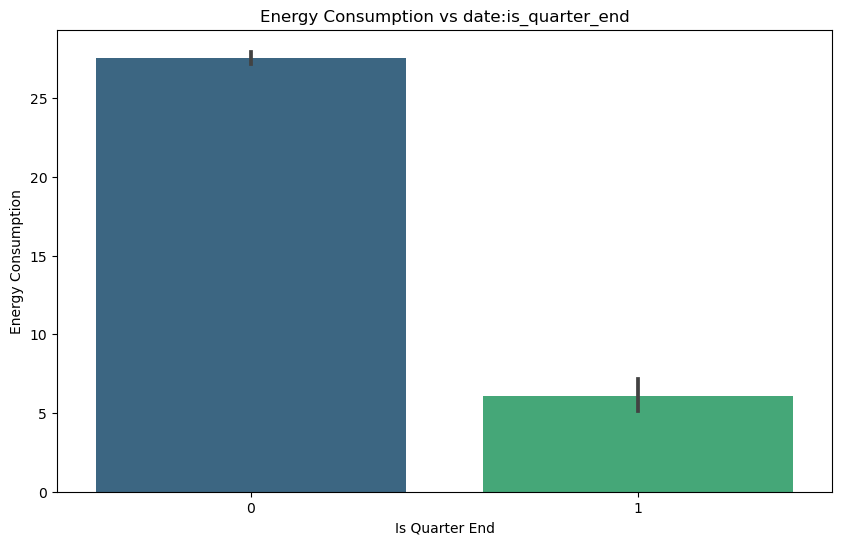

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='date:is_quarter_end', y='Energy_Consumption', data=df, palette="viridis")
plt.title('Energy Consumption vs date:is_quarter_end')
plt.xlabel('Is Quarter End')
plt.ylabel('Energy Consumption')
plt.show()


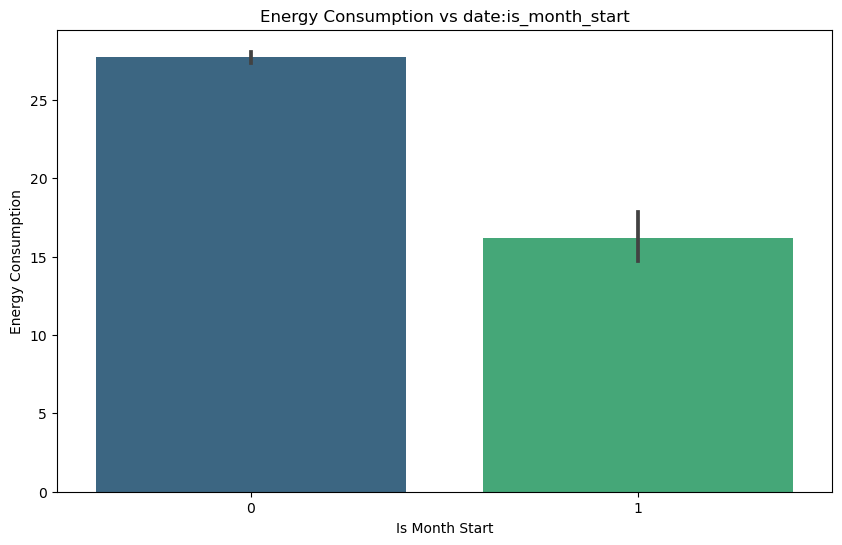

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='date:is_month_start', y='Energy_Consumption', data=df, palette="viridis")
plt.title('Energy Consumption vs date:is_month_start')
plt.xlabel('Is Month Start')
plt.ylabel('Energy Consumption')
plt.show()


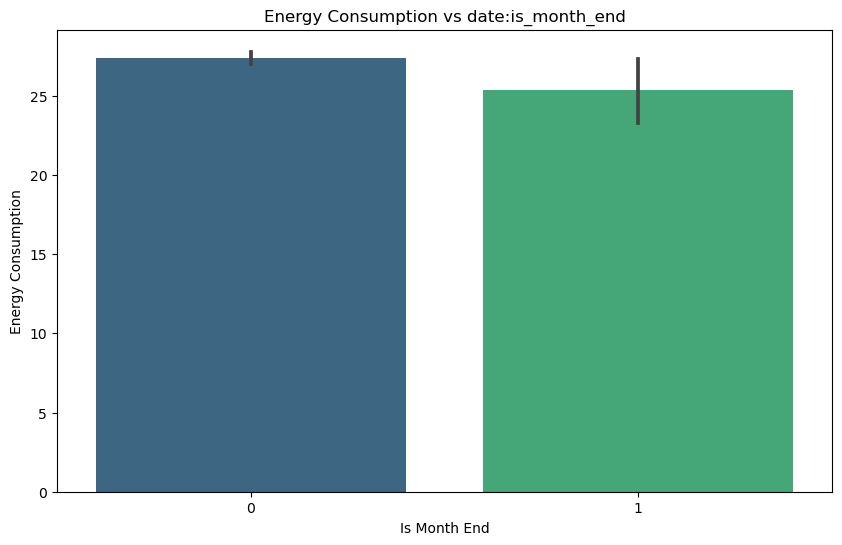

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='date:is_month_end', y='Energy_Consumption', data=df, palette="viridis")
plt.title('Energy Consumption vs date:is_month_end')
plt.xlabel('Is Month End')
plt.ylabel('Energy Consumption')
plt.show()


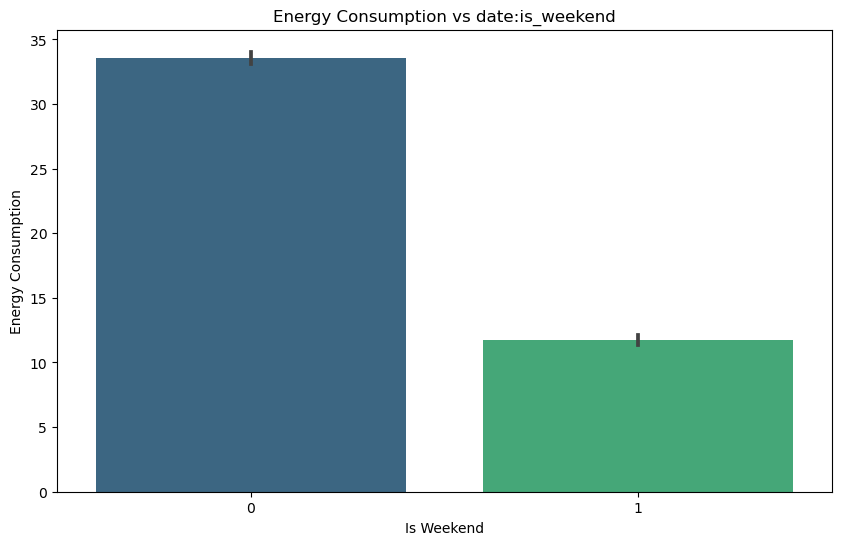

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='date:is_weekend', y='Energy_Consumption', data=df, palette="viridis")
plt.title('Energy Consumption vs date:is_weekend')
plt.xlabel('Is Weekend')
plt.ylabel('Energy Consumption')
plt.show()


C:\Users\EJ312WS\AppData\Local\Temp\ipykernel_19160\882583858.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='date:hour', y='Energy_Consumption', data=df, palette="viridis")


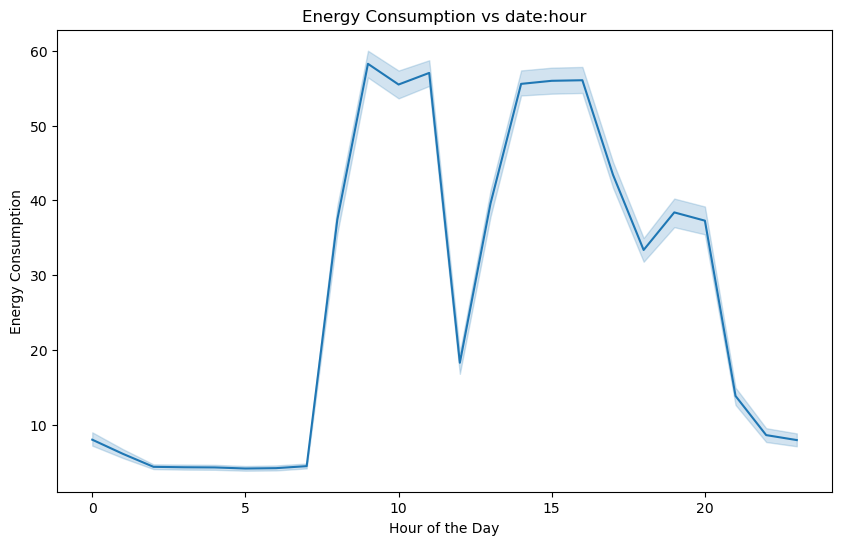

In [47]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date:hour', y='Energy_Consumption', data=df, palette="viridis")
plt.title('Energy Consumption vs date:hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption')
plt.show()


C:\Users\EJ312WS\AppData\Local\Temp\ipykernel_19160\3492800591.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='date:minute', y='Energy_Consumption', data=df, palette="viridis")


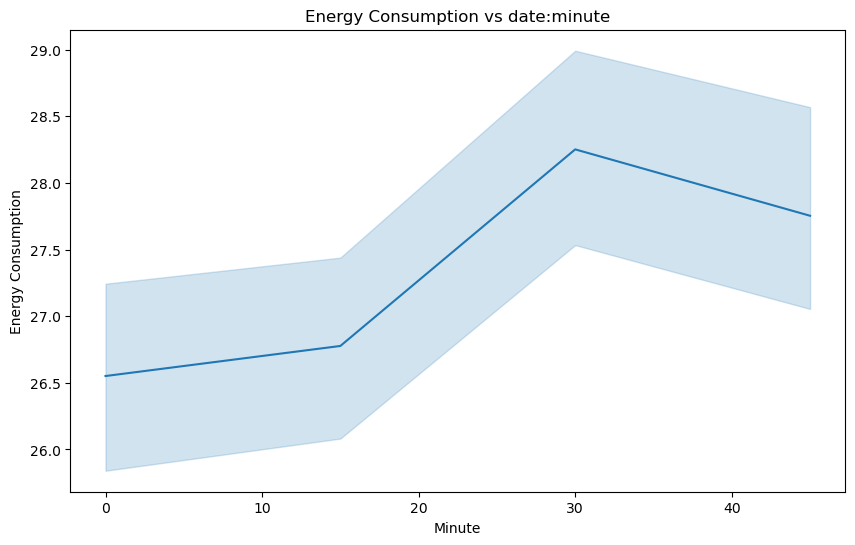

In [48]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date:minute', y='Energy_Consumption', data=df, palette="viridis")
plt.title('Energy Consumption vs date:minute')
plt.xlabel('Minute')
plt.ylabel('Energy Consumption')
plt.show()


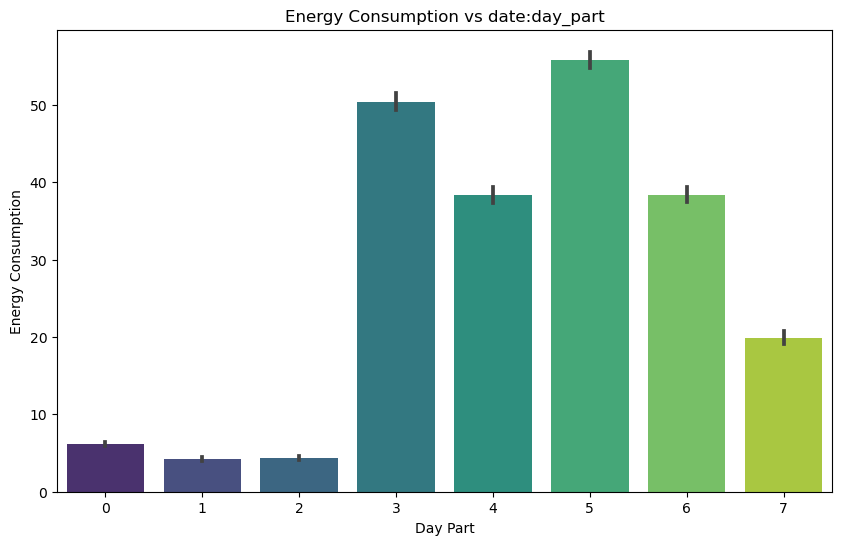

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='date:day_part', y='Energy_Consumption', data=df, palette="viridis")
plt.title('Energy Consumption vs date:day_part')
plt.xlabel('Day Part')
plt.ylabel('Energy Consumption')
plt.show()


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

                              Energy_Consumption      LaRP      LeRP  \
Energy_Consumption                      1.000000  0.895440 -0.324078   
LaRP                                    0.895440  1.000000 -0.404410   
LeRP                                   -0.324078 -0.404410  1.000000   
LaPF                                    0.387515  0.145180  0.526259   
LePF                                    0.352853  0.406997 -0.943987   
Emissions_Air_Quality_Metric            0.987338  0.885388 -0.331402   
date:month                             -0.112913 -0.040300 -0.027563   
date:day                               -0.007166 -0.011055 -0.014805   
date:day_of_week                       -0.241990 -0.257404  0.213454   
date:day_of_year                       -0.112503 -0.040675 -0.028729   
date:is_year_start                     -0.037173 -0.036090  0.042750   
date:is_quarter_start                  -0.060145 -0.053414  0.052837   
date:is_year_end                       -0.037396 -0.037988  0.03

C:\Users\EJ312WS\AppData\Local\Temp\ipykernel_19160\1715194406.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [51]:
# Find the absolute values of the correlations with 'Energy_Consumption'
correlation_with_target = correlation_matrix['Energy_Consumption'].abs()

# Sort the features by their absolute correlation with 'Energy_Consumption'
sorted_correlation = correlation_with_target.sort_values(ascending=False)

In [52]:
# Display the sorted correlations
print("\nFeatures sorted by correlation with Energy_Consumption:\n", sorted_correlation)

# Best feature
best_feature = sorted_correlation.index[1]  # The first index is 'Energy_Consumption' itself
print("\nBest feature to estimate Energy_Consumption:", best_feature)


Features sorted by correlation with Energy_Consumption:
 Energy_Consumption              1.000000
Emissions_Air_Quality_Metric    0.987338
LaRP                            0.895440
LLR                             0.867424
TRP                             0.830743
Combined PF                     0.690033
LaPF                            0.387515
LePF                            0.352853
date:day_part                   0.344423
LeRP                            0.324078
date:is_weekend                 0.295366
date:day_of_week                0.241990
date:hour                       0.234682
date:month                      0.112913
date:day_of_year                0.112503
date:is_quarter_end             0.067091
date:is_month_start             0.061453
date:is_quarter_start           0.060145
date:is_year_end                0.037396
date:is_year_start              0.037173
date:minute                     0.017034
date:is_month_end               0.010909
date:day                        0.007166

In [53]:
# List of features to keep
features_to_keep = [
    'Energy_Consumption', 
    'Emissions_Air_Quality_Metric', 
    'LaRP',
    'LeRP',
    'TRP', 
    'Combined PF', 
    'LLR',
    'Duty', 
    'LaPF', 
    'LePF', 
    'date:day_part'
]

# Creating a new DataFrame with only the selected features
df_selected_features = df[features_to_keep]

# Displaying the new DataFrame
df_selected_features

,Energy_Consumption,Emissions_Air_Quality_Metric,LaRP,LeRP,TRP,Combined PF,LLR,Duty,LaPF,LePF,date:day_part
0,3.21,105,2.96,0.00,2.96,86.605,29.600000,Low,73.21,100.00,0
1,3.95,101,4.46,0.00,4.46,83.390,44.600000,Low,66.78,100.00,0
2,3.23,94,3.28,0.00,3.28,85.135,32.800000,Low,70.27,100.00,0
3,3.33,99,3.56,0.00,3.56,84.050,35.600000,Low,68.10,100.00,0
4,3.79,109,4.49,0.00,4.49,82.360,44.900000,Low,64.72,100.00,0
...,...,...,...,...,...,...,...,...,...,...,...
32845,3.84,91,4.56,0.00,4.56,82.185,45.600000,Low,64.37,100.00,7
32846,3.81,99,3.76,0.00,3.76,85.355,37.600000,Low,70.71,100.00,0
32847,3.82,107,3.16,0.07,3.09,88.315,18.588235,Low,76.64,99.99,0
32848,3.85,105,3.07,0.13,2.94,88.840,13.347826,Low,77.72,99.96,0


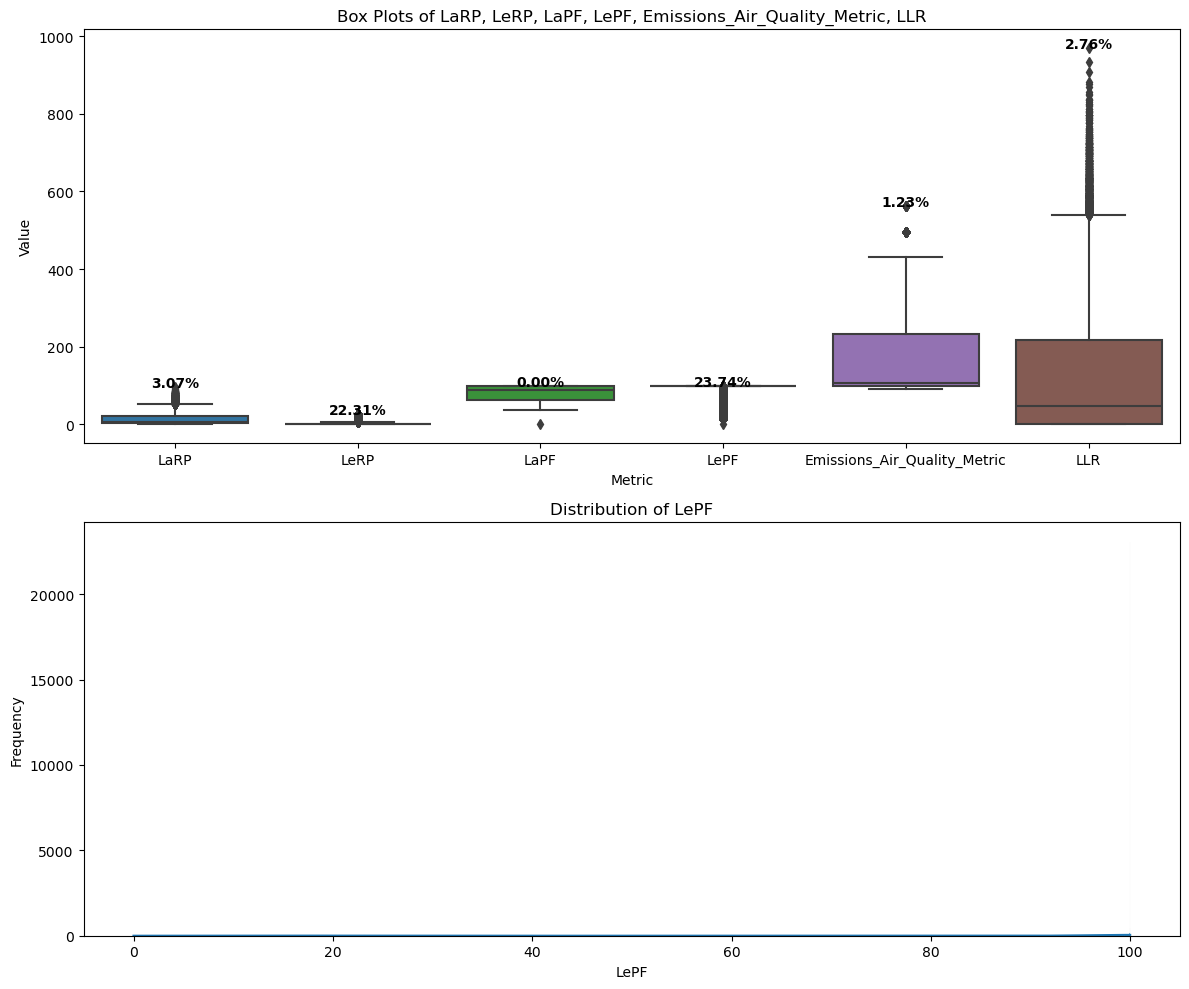

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns you want to plot
columns_to_plot = ['LaRP', 'LeRP', 'LaPF', 'LePF', 'Emissions_Air_Quality_Metric', 'LLR']

# Melt the DataFrame to a long format
df_melted = df_selected_features.melt(value_vars=columns_to_plot)

# Function to calculate the percentage of outliers
def calculate_outliers_percentage(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    percentage = len(outliers) / len(series) * 100
    return percentage

# Calculate the percentage of outliers for each column
outlier_percentages = df_selected_features[columns_to_plot].apply(calculate_outliers_percentage)

# Create the box plot
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
ax = sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Box Plots of LaRP, LeRP, LaPF, LePF, Emissions_Air_Quality_Metric, LLR')
plt.xlabel('Metric')
plt.ylabel('Value')

# Annotate the box plot with the percentage of outliers
for i, column in enumerate(columns_to_plot):
    outlier_percentage = outlier_percentages[column]
    ax.text(i, df_selected_features[column].max(), f'{outlier_percentage:.2f}%', 
            horizontalalignment='center', size='medium', color='black', weight='semibold')

# Create the histogram for LePF
plt.subplot(2, 1, 2)
sns.histplot(df_selected_features['LePF'], kde=True)
plt.title('Distribution of LePF')
plt.xlabel('LePF')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


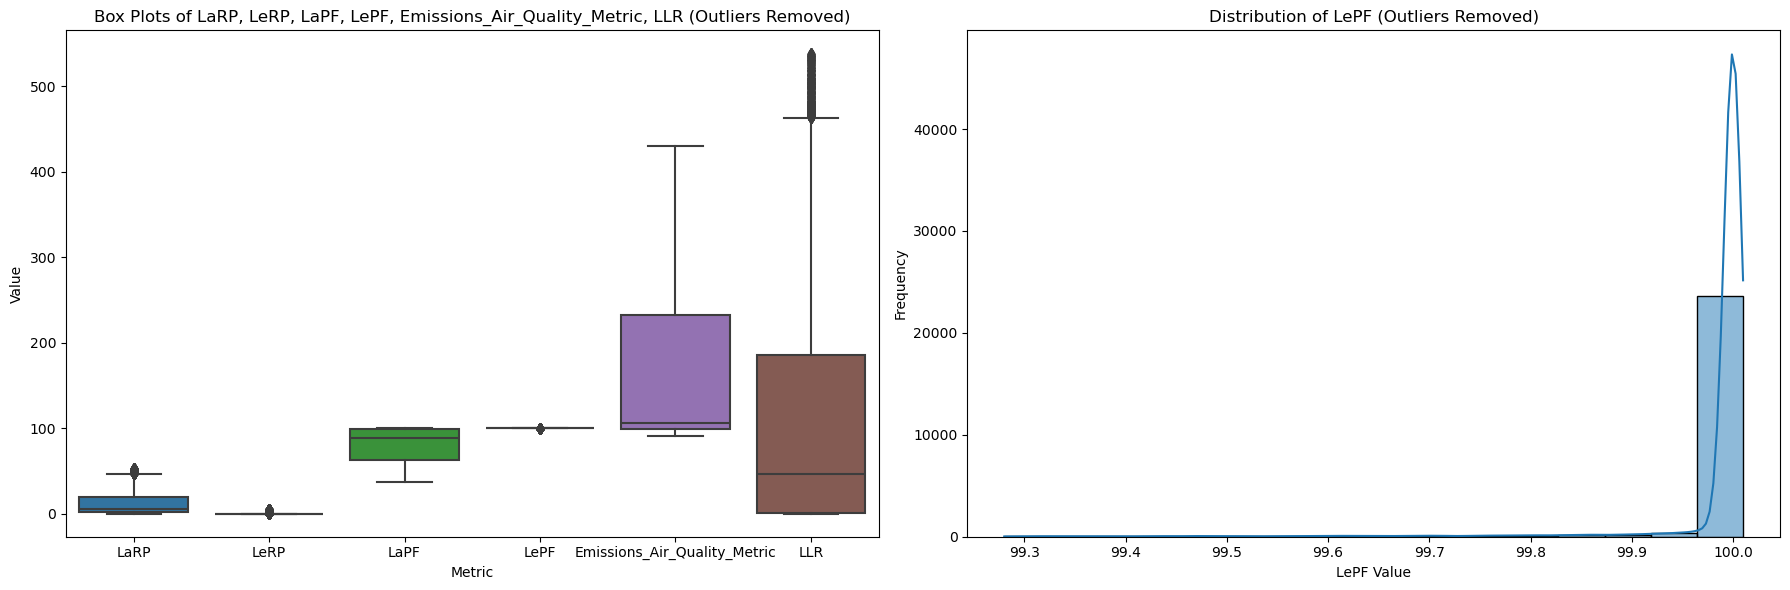

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns you want to plot
columns_to_plot = ['LaRP', 'LeRP', 'LaPF', 'LePF', 'Emissions_Air_Quality_Metric', 'LLR']

# Function to remove outliers using the IQR method
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series >= lower_bound) & (series <= upper_bound)]

# Remove outliers for each column
df_cleaned = df_selected_features[columns_to_plot].apply(remove_outliers)

# Melt the cleaned DataFrame to a long format
df_melted_cleaned = df_cleaned.melt(value_vars=columns_to_plot, var_name='Metric', value_name='Value')

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Create the box plot for the cleaned data
sns.boxplot(x='Metric', y='Value', data=df_melted_cleaned, ax=axes[0])
axes[0].set_title('Box Plots of LaRP, LeRP, LaPF, LePF, Emissions_Air_Quality_Metric, LLR (Outliers Removed)')
axes[0].set_xlabel('Metric')
axes[0].set_ylabel('Value')

# Create the distribution plot for 'LePF'
sns.histplot(df_cleaned['LePF'].dropna(), kde=True, ax=axes[1])  # Drop NaNs for the distribution plot
axes[1].set_title('Distribution of LePF (Outliers Removed)')
axes[1].set_xlabel('LePF Value')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [56]:
df_selected_features

,Energy_Consumption,Emissions_Air_Quality_Metric,LaRP,LeRP,TRP,Combined PF,LLR,Duty,LaPF,LePF,date:day_part
0,3.21,105,2.96,0.00,2.96,86.605,29.600000,Low,73.21,100.00,0
1,3.95,101,4.46,0.00,4.46,83.390,44.600000,Low,66.78,100.00,0
2,3.23,94,3.28,0.00,3.28,85.135,32.800000,Low,70.27,100.00,0
3,3.33,99,3.56,0.00,3.56,84.050,35.600000,Low,68.10,100.00,0
4,3.79,109,4.49,0.00,4.49,82.360,44.900000,Low,64.72,100.00,0
...,...,...,...,...,...,...,...,...,...,...,...
32845,3.84,91,4.56,0.00,4.56,82.185,45.600000,Low,64.37,100.00,7
32846,3.81,99,3.76,0.00,3.76,85.355,37.600000,Low,70.71,100.00,0
32847,3.82,107,3.16,0.07,3.09,88.315,18.588235,Low,76.64,99.99,0
32848,3.85,105,3.07,0.13,2.94,88.840,13.347826,Low,77.72,99.96,0


In [57]:
df_selected_features['Duty']=df_selected_features['Duty'].replace({'Low':0, 
                       'Average':1,
                       'Major':2})
df_selected_features

C:\Users\EJ312WS\AppData\Local\Temp\ipykernel_19160\1425745818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features['Duty']=df_selected_features['Duty'].replace({'Low':0,


,Energy_Consumption,Emissions_Air_Quality_Metric,LaRP,LeRP,TRP,Combined PF,LLR,Duty,LaPF,LePF,date:day_part
0,3.21,105,2.96,0.00,2.96,86.605,29.600000,0,73.21,100.00,0
1,3.95,101,4.46,0.00,4.46,83.390,44.600000,0,66.78,100.00,0
2,3.23,94,3.28,0.00,3.28,85.135,32.800000,0,70.27,100.00,0
3,3.33,99,3.56,0.00,3.56,84.050,35.600000,0,68.10,100.00,0
4,3.79,109,4.49,0.00,4.49,82.360,44.900000,0,64.72,100.00,0
...,...,...,...,...,...,...,...,...,...,...,...
32845,3.84,91,4.56,0.00,4.56,82.185,45.600000,0,64.37,100.00,7
32846,3.81,99,3.76,0.00,3.76,85.355,37.600000,0,70.71,100.00,0
32847,3.82,107,3.16,0.07,3.09,88.315,18.588235,0,76.64,99.99,0
32848,3.85,105,3.07,0.13,2.94,88.840,13.347826,0,77.72,99.96,0


Random Forest Results:
   Train Mean Squared Error  Train Root Mean Squared Error  \
0                  0.140378                       0.374671   

   Train Mean Absolute Error  Train R2 Score  Test Mean Squared Error  \
0                   0.128235        0.999873                 0.649922   

   Test Root Mean Squared Error  Test Mean Absolute Error  Test R2 Score  \
0                      0.806177                  0.311254       0.999424   

   Training Time (s)  Testing Time (s)  
0           45.69515          0.834961  


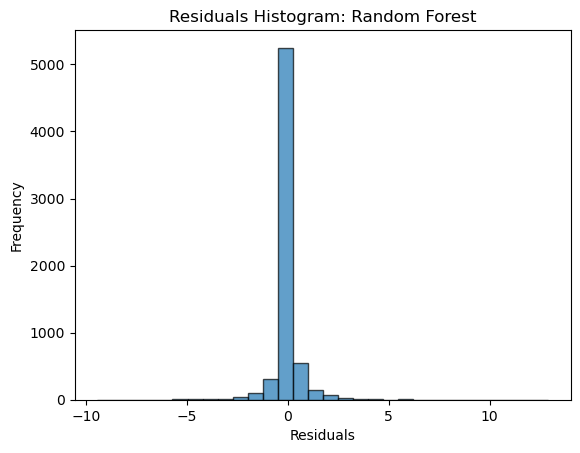

In [59]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm
import matplotlib.pyplot as plt



# X and y split (X = input features and y = target feature)
X = df_selected_features.drop(columns=['Energy_Consumption'])
y = df_selected_features['Energy_Consumption']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features after the train-test split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest

rf = RandomForestRegressor()
start_time = time.time()
rf.fit(X_train_scaled, y_train)
training_time_rf = time.time() - start_time

# Predict with Random Forest
start_time = time.time()
y_pred_train_rf = rf.predict(X_train_scaled)
y_pred_test_rf = rf.predict(X_test_scaled)
testing_time_rf = time.time() - start_time

# Evaluate Random Forest
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

results_rf = {
    'Train Mean Squared Error': mse_train_rf,
    'Train Root Mean Squared Error': rmse_train_rf,
    'Train Mean Absolute Error': mae_train_rf,
    'Train R2 Score': r2_train_rf,
    'Test Mean Squared Error': mse_test_rf,
    'Test Root Mean Squared Error': rmse_test_rf,
    'Test Mean Absolute Error': mae_test_rf,
    'Test R2 Score': r2_test_rf,
    'Training Time (s)': training_time_rf,
    'Testing Time (s)': testing_time_rf
}

print("Random Forest Results:")
print(pd.DataFrame(results_rf, index=[0]))

# Plot histogram of residuals for Random Forest
plt.hist(y_test - y_pred_test_rf, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Histogram: Random Forest')
plt.show()

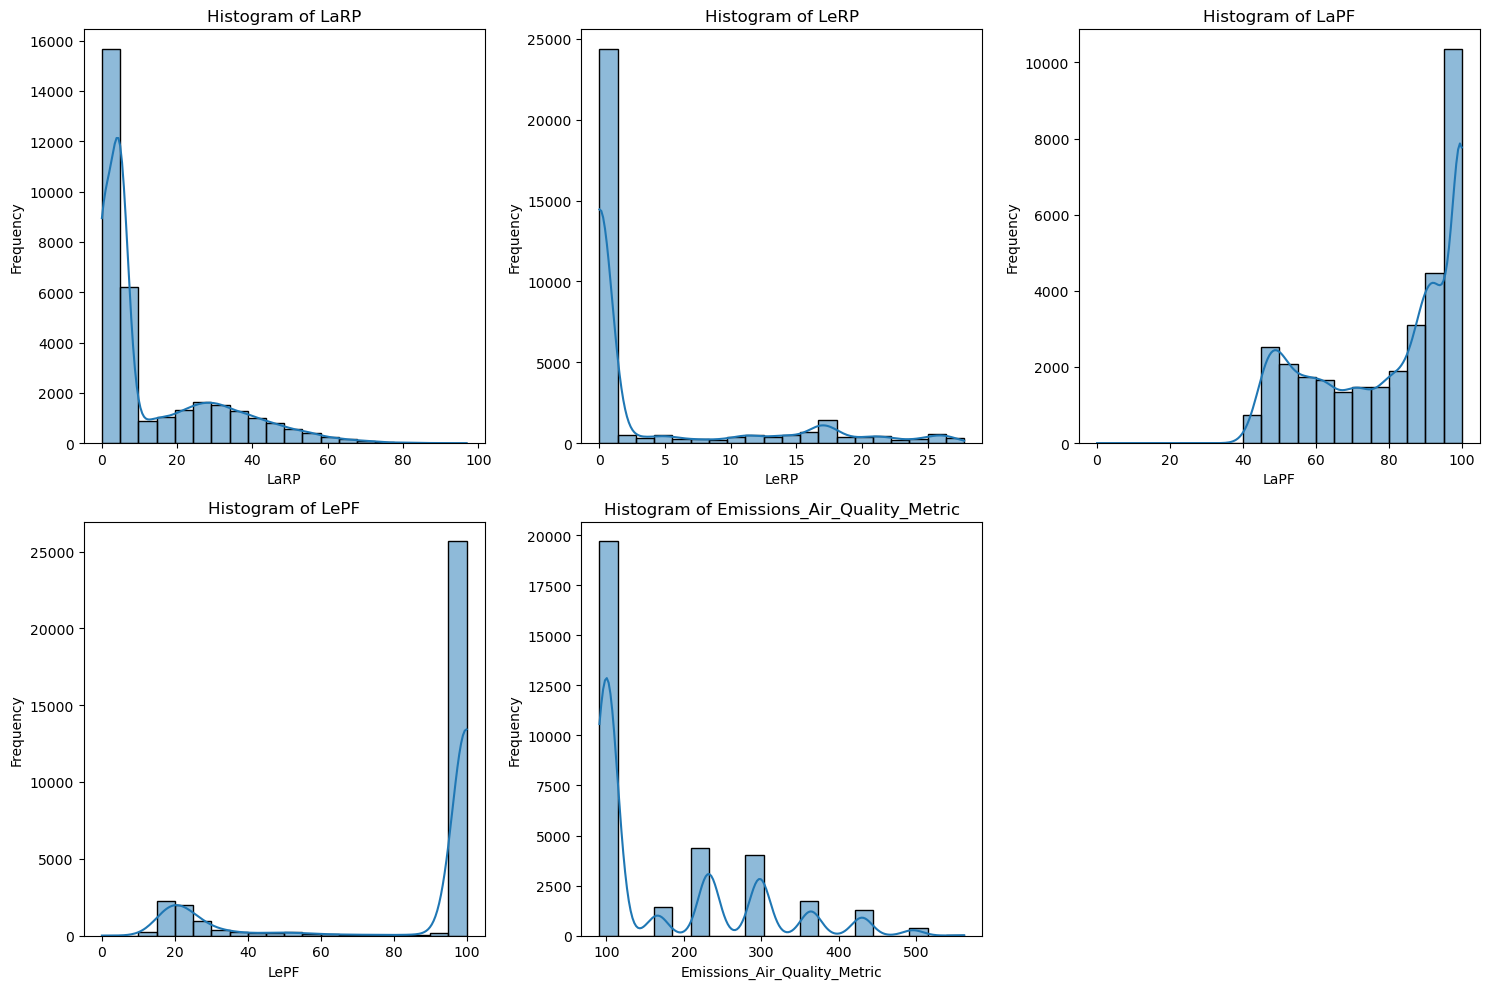

In [61]:
# Define the columns you want to plot
columns_to_plot = ['LaRP', 'LeRP', 'LaPF', 'LePF', 'Emissions_Air_Quality_Metric']

# Create histograms
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_selected_features[column], kde=True, bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [63]:
df_selected_features

,Energy_Consumption,Emissions_Air_Quality_Metric,LaRP,LeRP,TRP,Combined PF,LLR,Duty,LaPF,LePF,date:day_part
0,3.21,105,2.96,0.00,2.96,86.605,29.600000,0,73.21,100.00,0
1,3.95,101,4.46,0.00,4.46,83.390,44.600000,0,66.78,100.00,0
2,3.23,94,3.28,0.00,3.28,85.135,32.800000,0,70.27,100.00,0
3,3.33,99,3.56,0.00,3.56,84.050,35.600000,0,68.10,100.00,0
4,3.79,109,4.49,0.00,4.49,82.360,44.900000,0,64.72,100.00,0
...,...,...,...,...,...,...,...,...,...,...,...
32845,3.84,91,4.56,0.00,4.56,82.185,45.600000,0,64.37,100.00,7
32846,3.81,99,3.76,0.00,3.76,85.355,37.600000,0,70.71,100.00,0
32847,3.82,107,3.16,0.07,3.09,88.315,18.588235,0,76.64,99.99,0
32848,3.85,105,3.07,0.13,2.94,88.840,13.347826,0,77.72,99.96,0


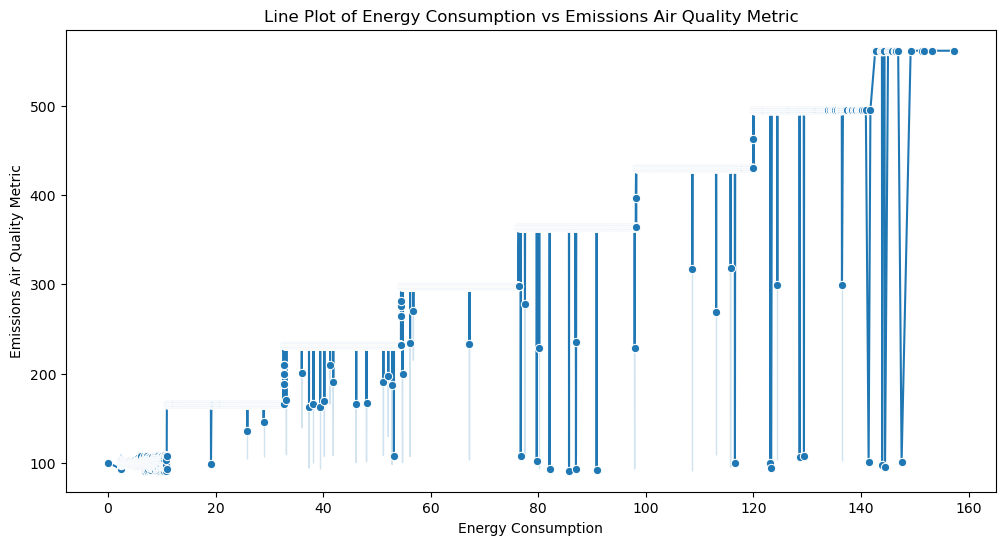

In [65]:
# Create a line plot of Energy Consumption vs Emissions Air Quality Metric
plt.figure(figsize=(12, 6))
sns.lineplot(x='Energy_Consumption', y='Emissions_Air_Quality_Metric', data=df_selected_features, marker='o')
plt.title('Line Plot of Energy Consumption vs Emissions Air Quality Metric')
plt.xlabel('Energy Consumption')
plt.ylabel('Emissions Air Quality Metric')
plt.show()

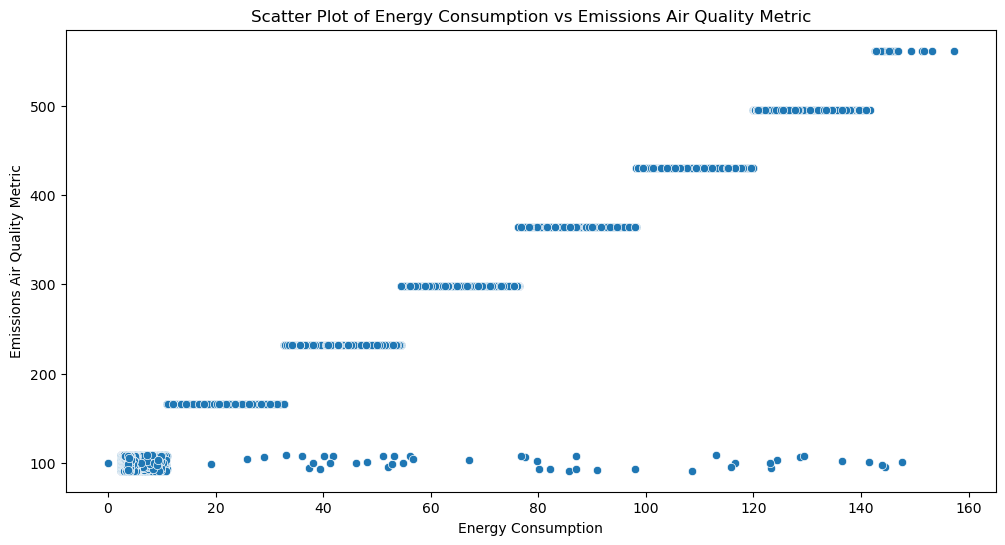

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Energy_Consumption', y='Emissions_Air_Quality_Metric', data=df_selected_features)
plt.title('Scatter Plot of Energy Consumption vs Emissions Air Quality Metric')
plt.xlabel('Energy Consumption')
plt.ylabel('Emissions Air Quality Metric')
plt.show()


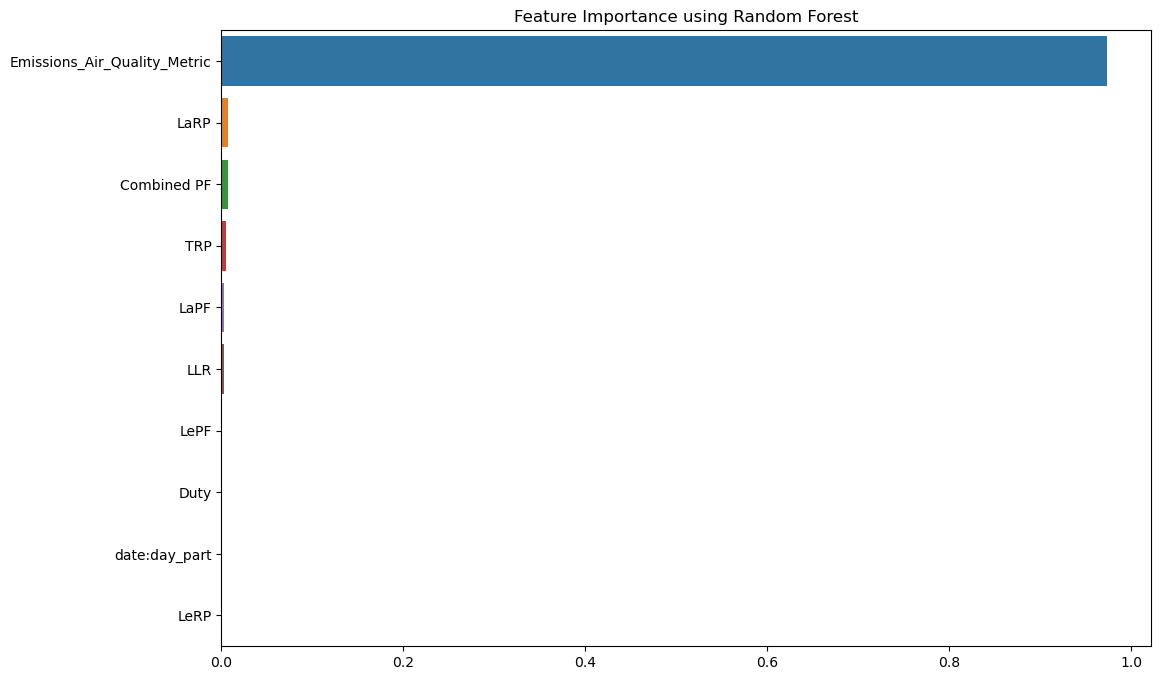

In [69]:
# Train Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False, inplace=True)

# Plotting feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance using Random Forest')
plt.show()

In [71]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train, y_train)


selection.feature_importances_

array([5.62086523e-01, 1.18383523e-01, 4.06184824e-04, 9.65007089e-02,
       4.57450692e-02, 1.35266645e-01, 2.89916614e-02, 9.13025852e-03,
       3.21954101e-03, 2.69884674e-04])

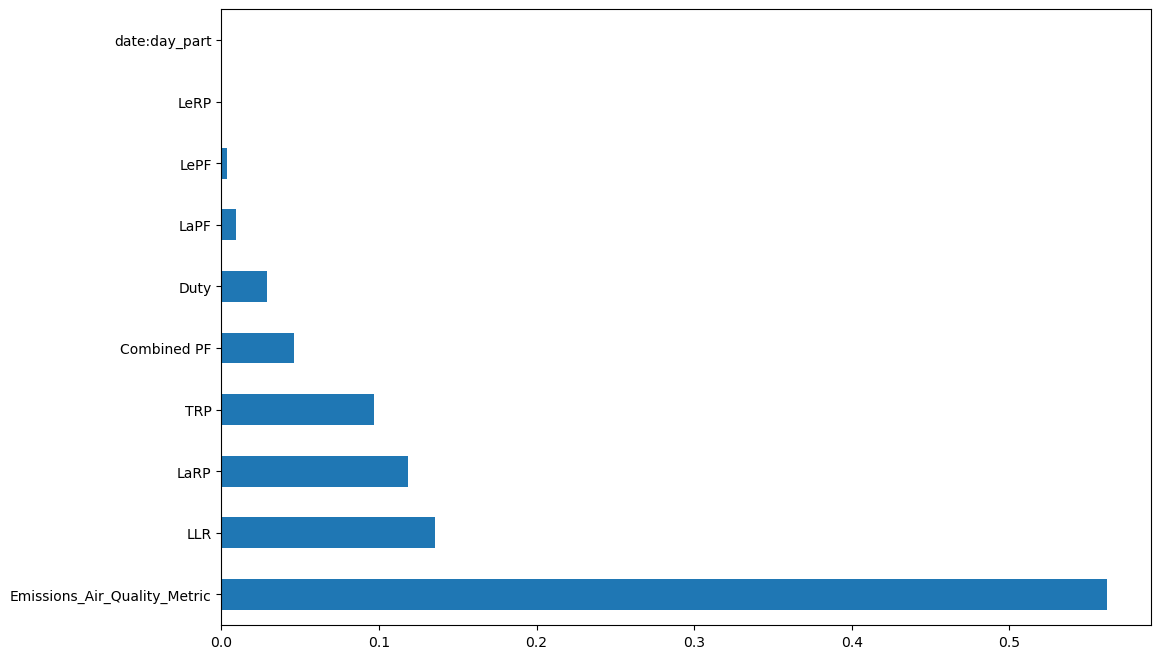

In [73]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [74]:
pip install --upgrade lightgbm dask


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: lightgbm in c:\users\ej312ws\anaconda3\lib\site-packages (4.5.0)
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.2 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 4.2 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2024.7.1
    Uninstalling dask-2024.7.1:
      Successfully uninstalled dask-2024.7.1



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2023.11.0 requires dask==2023.11.0, but you have dask 2024.8.0 which is incompatible.


In [76]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from tqdm import tqdm
import time

# X and y split (X = input features and y = target feature)
X = df_selected_features.drop(columns=['Energy_Consumption'])
y = df_selected_features['Energy_Consumption']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, drop=None)
X_encoded = encoder.fit_transform(X[categorical_features])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Combine numerical and encoded categorical features
X_final = pd.concat([X[numerical_features].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.15, random_state=42)

# Standardize numerical features after the train-test split
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Initialize models (excluding LightGBM)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'SVR': SVR(kernel='rbf', C=10000, epsilon=0.1),
    'KNeighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),
    'XGBoost': XGBRegressor(eval_metric='rmse'),
    'Extra Trees': ExtraTreesRegressor(),
    'Voting': VotingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor()),
        ('gbr', GradientBoostingRegressor())
    ]),
    'Stacking': StackingRegressor(estimators=[
        ('rf', RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)),
        ('gbdt', GradientBoostingRegressor(n_estimators=100, max_features=0.5)),
        ('xgb', XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5))
    ])
}

# Train and evaluate models
results = {}

for i, (name, model) in enumerate(tqdm(models.items()), 1):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    start_time = time.time()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    testing_time = time.time() - start_time

    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    results[name] = {
        'Train Mean Squared Error': mse_train,
        'Train Root Mean Squared Error': rmse_train,
        'Train Mean Absolute Error': mae_train,
        'Train R2 Score': r2_train,
        'Test Mean Squared Error': mse_test,
        'Test Root Mean Squared Error': rmse_test,
        'Test Mean Absolute Error': mae_test,
        'Test R2 Score': r2_test,
        'Training Time (s)': training_time,
        'Testing Time (s)': testing_time
    }

# Display results with exact values
pd.set_option('display.float_format', lambda x: '%.3f' % x)
results_df = pd.DataFrame(results).T
print(results_df)

# Plot histogram of residuals for each model
plt.figure(figsize=(20, 20))

for i, (name, model) in enumerate(tqdm(models.items()), 1):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    plt.subplot(4, 4, i)
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'Residuals Histogram: {name}')

plt.tight_layout()
plt.show()


C:\Users\EJ312WS\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
 36%|███▌      | 5/14 [01:10<01:49, 12.16s/it]

In [ ]:
results_df

In [ ]:
import pandas as pd

file_path = r"C:\Users\EJ312WS\Downloads\Dataset (1)\Dataset\Test.csv"

# Read the Excel file and select the sheet you want to read
df_test = pd.read_csv(file_path)  
# Print the contents of the sheet
df_test.head()


In [ ]:
df_test.date=pd.to_datetime(df_test.TimeStamp, infer_datetime_format=True)
df_test.info()

In [ ]:
def day_part(hour):
    if hour in [4,5]:
        return 1
    elif hour in [6,7]:
        return 2
    elif hour in [8,9,10]:
        return 3
    elif hour in [11,12,13]:
        return 4
    elif hour in [14,15,16]:
        return 5
    elif hour in [17, 18,19]:
        return 6
    elif hour in [20, 21, 22]:
        return 7
    elif hour in [23,0,1,2,3]:
        return 0

In [ ]:
import pandas as pd
import numpy as np

# Sample data (assuming df_test is already loaded with your data)
# df_test = pd.read_csv('path_to_your_file.csv')

# Convert the 'TimeStamp' column to datetime
df_test['date'] = pd.to_datetime(df_test['TimeStamp'])

# Extract date features
df_test['date:year'] = df_test['date'].dt.year
df_test['date:month'] = df_test['date'].dt.month
df_test['date:day'] = df_test['date'].dt.day
df_test['date:day_of_week'] = df_test['date'].dt.dayofweek  # corrected attribute name
df_test['date:day_of_year'] = df_test['date'].dt.dayofyear  # corrected attribute name
df_test['date:is_year_start'] = df_test['date'].dt.is_year_start
df_test['date:is_quarter_start'] = df_test['date'].dt.is_quarter_start
df_test['date:is_year_end'] = df_test['date'].dt.is_year_end
df_test['date:is_quarter_end'] = df_test['date'].dt.is_quarter_end
df_test['date:is_month_start'] = df_test['date'].dt.is_month_start
df_test['date:is_month_end'] = df_test['date'].dt.is_month_end
df_test['date:is_weekend'] = np.where(df_test['date:day_of_week'].isin([5, 6]), 1, 0)
df_test['date:hour'] = df_test['date'].dt.hour
df_test['date:minute'] = df_test['date'].dt.minute

# Define the day_part function
def day_part(hour):
    if hour in [4,5]:
        return 1
    elif hour in [6,7]:
        return 2
    elif hour in [8,9,10]:
        return 3
    elif hour in [11,12,13]:
        return 4
    elif hour in [14,15,16]:
        return 5
    elif hour in [17, 18,19]:
        return 6
    elif hour in [20, 21, 22]:
        return 7
    elif hour in [23,0,1,2,3]:
        return 0

df_test['date:day_part'] = df_test['date:hour'].apply(day_part)

# Convert boolean columns to integer
df_test[['date:is_month_end', 'date:is_month_start',
         'date:is_quarter_end', 'date:is_quarter_start',
         'date:is_year_end', 'date:is_year_start']] = df_test[['date:is_month_end', 'date:is_month_start',
                                                              'date:is_quarter_end', 'date:is_quarter_start',
                                                              'date:is_year_end', 'date:is_year_start']].replace({True: 1, False: 0})

# Drop the original 'date' and 'TimeStamp' columns if desired
df_test = df_test.drop(['date', 'TimeStamp'], axis=1)

# Print the first few rows of the modified DataFrame
df_test.head()


In [ ]:
nunique_df=df_test.nunique().reset_index()
remove_col=nunique_df[(nunique_df[0]==0) | (nunique_df[0]==1) ]['index'].tolist()
remove_col[:5]

In [ ]:
df_test=df_test.drop(remove_col,axis=1)
df_test

In [ ]:
df_test=df_test.drop(['Unnamed: 0'],axis=1)
df_test.head()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Compute the correlation matrix
correlation_matrix = df_test.corr()

# Print the correlation matrix
print(correlation_matrix)



In [ ]:
df_test['Duty'].value_counts()

In [ ]:
df_test['Duty']=df_test['Duty'].replace({'Low':0,
                       'Average':1,
                       'Major':2})
df_test

In [ ]:
# Replace 0 with 0.1 in the 'LeRP' column
df_test['LeRP'] = df_test['LeRP'].replace(0, 0.1)

# Total Reactive Power (TRP)
df_test['TRP'] = df_test['LaRP'] - df_test['LeRP']

# Lagging/Leading Ratio (LLR)
df_test['LLR'] = df_test['LaRP'] / df_test['LeRP']

# Combined Power Factor (Combined PF)
df_test['Combined PF'] = (df_test['LaPF'] + df_test['LePF']) / 2

# Displaying the DataFrame
df_test.head()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_test['Duty']=df_test['Duty'].replace({'Low':0,
                       'Average':1,
                       'Major':2})


# Compute the correlation matrix
correlation_matrix = df_test.corr()

# Print the correlation matrix
print(correlation_matrix)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (assuming df_test is already defined)
# df_test = ...

# Replace 'Duty' values
df_test['Duty'] = df_test['Duty'].replace({'Low': 0, 'Average': 1, 'Major': 2})

# Compute the correlation matrix
correlation_matrix = df_test.corr()

# Print the unsorted correlation matrix
print("Unsorted Correlation Matrix:")
print(correlation_matrix)

# Sort the correlation matrix by the 'Energy_Consumption' column
sorted_correlation_matrix = correlation_matrix['Energy_Consumption'].sort_values(ascending=False)

# Print the sorted correlation matrix
print("\nSorted Correlation Matrix by 'Energy_Consumption':")
print(sorted_correlation_matrix)

# Optional: Visualize the sorted correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# List of features to keep
features_to_keep = [
    'Emissions_Air_Quality_Metric',
    'LaRP',
    'LeRP',
    'TRP',
    'Combined PF',
    'LLR',
    'Duty',
    'LaPF',
    'LePF',
    'date:day_part'
]

# Creating a new DataFrame with only the selected features
df_test_selected_features = df_test[features_to_keep]

# Displaying the new DataFrame
df_test_selected_features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your train and test data
train_data = df_selected_features
test_data = df_test_selected_features

# Assuming 'Energy_Consumption' is the target variable in the training data
X_train = df_selected_features.drop('Energy_Consumption', axis=1)
y_train = df_selected_features['Energy_Consumption']

# Test data preprocessing
X_test = df_test_selected_features  # Since the test data does not have 'Energy_Consumption' column

# Step 3: Train the Model
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Make Predictions on the Test Data
# Make predictions on the test set
y_pred_test = model.predict(X_test)

# If you want to save the predictions to a file
test_data['Predicted_Energy_Consumption'] = y_pred_test
test_data.to_csv('predicted_test_data.csv', index=False)

# Step 5: Evaluate the Model on the Training Data (using validation set)
# Split the training data into training and validation sets for evaluation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model on the training split
model.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_pred_val = model.predict(X_val)

# Calculate metrics
mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_val)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

# Optional: Visualize the Results
plt.scatter(y_val, y_pred_val)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted on Validation Set')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your train and test data
train_data = df_selected_features
test_data = df_test_selected_features

# Assuming 'Energy_Consumption' is the target variable in the training data
X_train = df_selected_features.drop('Energy_Consumption', axis=1)
y_train = df_selected_features['Energy_Consumption']

# Ensure test data has the same columns as training data, excluding 'Energy_Consumption'
X_test = df_test_selected_features[X_train.columns]

# Step 3: Train the Model
# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Make Predictions on the Test Data
# Make predictions on the test set
y_pred_test = model.predict(X_test)

# If you want to save the predictions to a file
test_data['Predicted_Energy_Consumption'] = y_pred_test
test_data.to_csv('predicted_test_data.csv', index=False)

# Step 5: Evaluate the Model on the Training Data (using validation set)
# Split the training data into training and validation sets for evaluation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model on the training split
model.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_pred_val = model.predict(X_val)

# Calculate metrics
mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_val)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

# Optional: Visualize the Results
plt.scatter(y_val, y_pred_val)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted on Validation Set')
plt.show()


In [ ]:
X_train

In [ ]:
X_train

In [ ]:
df_test_selected_features= df_test_selected_features.drop(columns ='Predicted_Energy_Consumption')

In [ ]:
df_test_selected_features= df_test_selected_features.drop(columns ='date:day_part')

In [ ]:
df_test_selected_features

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Initialize the SVR
svr_regressor = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1))

# Train the regressor
svr_regressor.fit(X_train, y_train)

# Make predictions
y_pred = svr_regressor.predict(df_test_selected_features)


In [118]:
predictions_df = pd.DataFrame(y_pred,columns=['Energy_Consumption'])
predictions_df.to_csv('Energy_Consumption_svr.csv',index=False)

In [143]:
pwd

'C:\\Users\\EJ312WS\\my project\\power station estimation'